In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('Salary_Data.csv')

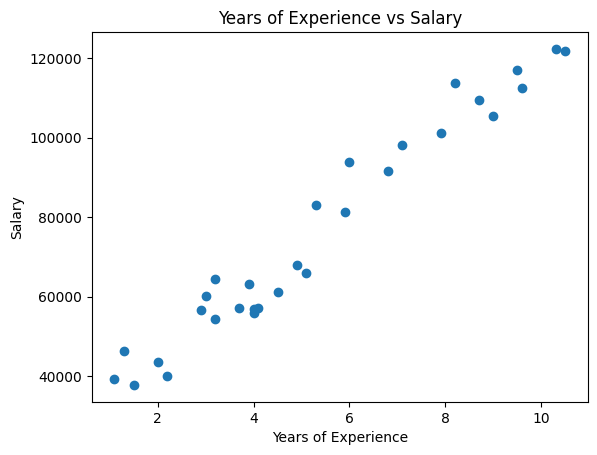

In [3]:
plt.scatter(data['YearsExperience'], data['Salary'])
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [4]:
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = model.predict(X_test)

In [7]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 49830096.85590839
R-squared: 0.9024461774180497


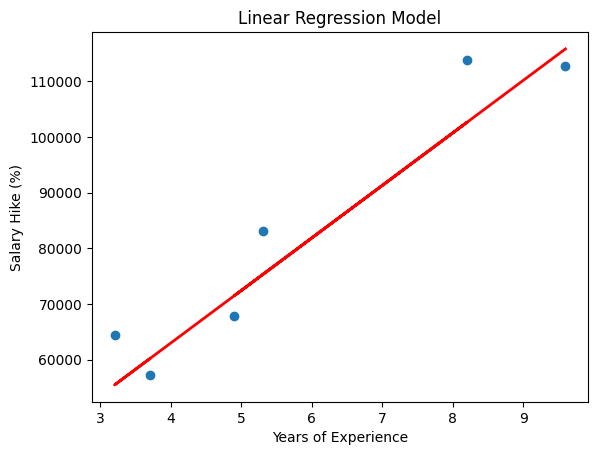

In [8]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression Model')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Hike (%)')
plt.show()


Apply a transformation (Standard Scaling) to both features

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [10]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [11]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [12]:
y_pred_scaled = model_scaled.predict(X_test_scaled)


In [13]:
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
print('Mean Squared Error (scaled):', mse_scaled)
print('R-squared (scaled):', r2_scaled)

Mean Squared Error (scaled): 0.06858932896507035
R-squared (scaled): 0.9024461774180498


In [16]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    return y_pred

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Model without transformation:')
evaluate_model(model, X_test, y_test)

Model without transformation:
Mean Squared Error: 49830096.85590839
R-squared: 0.9024461774180497


array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [18]:
X_train_log = np.log(X_train)
X_test_log = np.log(X_test)


In [19]:
model_log = LinearRegression()
model_log.fit(X_train_log, y_train)
print('\nModel with logarithmic transformation:')
y_pred_log = evaluate_model(model_log, X_test_log, y_test)


Model with logarithmic transformation:
Mean Squared Error: 84567607.74831854
R-squared: 0.8344395471211845


In [20]:
X_train_sqrt = np.sqrt(X_train)
X_test_sqrt = np.sqrt(X_test)

In [21]:
model_sqrt = LinearRegression()
model_sqrt.fit(X_train_sqrt, y_train)
print('\nModel with square root transformation:')
y_pred_sqrt = evaluate_model(model_sqrt, X_test_sqrt, y_test)


Model with square root transformation:
Mean Squared Error: 48985143.07423967
R-squared: 0.9041003678874203


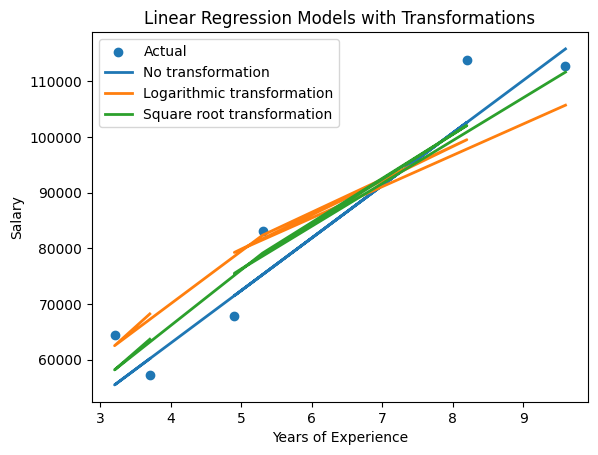

In [22]:
plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, model.predict(X_test), label='No transformation', linewidth=2)
plt.plot(X_test, model_log.predict(X_test_log), label='Logarithmic transformation', linewidth=2)
plt.plot(X_test, model_sqrt.predict(X_test_sqrt), label='Square root transformation', linewidth=2)
plt.legend()
plt.title('Linear Regression Models with Transformations')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()